In [1]:
# Import our dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

# CREATING INITIAL DATAFRAME

In [2]:
# Import our csv file

file = "Resources/mba_decision_dataset.csv"
decision_df = pd.read_csv(file)
decision_df.head()

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


In [3]:
# Convert "Yes" to 1 and "No" to 0

decision_df['Has Management Experience'] = decision_df['Has Management Experience'].replace({'Yes': 1, 'No': 0})
decision_df['Decided to Pursue MBA?'] = decision_df['Decided to Pursue MBA?'].replace({'Yes': 1, 'No': 0})

In [4]:
# Remove the "Person ID" column

decision_df.drop(columns=['Person ID'], inplace = True)
decision_df.head()

,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,Male,Arts,3.18,8,Entrepreneur,90624,0,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,1
1,24,Male,Arts,3.03,4,Analyst,53576,1,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,0
2,33,Female,Business,3.66,9,Engineer,79796,0,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,0
3,31,Male,Engineering,2.46,1,Manager,105956,0,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,0
4,28,Female,Business,2.75,9,Entrepreneur,96132,0,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,1


## 1.CREATING EMPLOYMENT DATAFRAMES

In [5]:
# Create a Dataframe based solely on employment factors
employment_df = decision_df[["Current Job Title","Years of Work Experience","Annual Salary (Before MBA)","Desired Post-MBA Role", "Expected Post-MBA Salary", "MBA Funding Source","Reason for MBA","Decided to Pursue MBA?"]]
employment_df

,Current Job Title,Years of Work Experience,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,MBA Funding Source,Reason for MBA,Decided to Pursue MBA?
0,Entrepreneur,8,90624,Finance Manager,156165,Loan,Entrepreneurship,1
1,Analyst,4,53576,Startup Founder,165612,Loan,Career Growth,0
2,Engineer,9,79796,Consultant,122248,Scholarship,Skill Enhancement,0
3,Manager,1,105956,Consultant,123797,Loan,Entrepreneurship,0
4,Entrepreneur,9,96132,Consultant,197509,Loan,Skill Enhancement,1
...,...,...,...,...,...,...,...,...
9995,Analyst,5,109172,Startup Founder,69000,Loan,Networking,1
9996,Manager,5,82515,Consultant,131054,Scholarship,Entrepreneurship,0
9997,Manager,8,34152,Consultant,100806,Loan,Networking,1
9998,Engineer,1,61897,Marketing Director,115872,Self-funded,Networking,1


### MBA Pursuers Dataframe

In [6]:
mba_pursuers = employment_df.loc[employment_df["Decided to Pursue MBA?"] == 1]
mba_pursuers

,Current Job Title,Years of Work Experience,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,MBA Funding Source,Reason for MBA,Decided to Pursue MBA?
0,Entrepreneur,8,90624,Finance Manager,156165,Loan,Entrepreneurship,1
4,Entrepreneur,9,96132,Consultant,197509,Loan,Skill Enhancement,1
7,Engineer,6,100072,Finance Manager,199447,Loan,Entrepreneurship,1
8,Entrepreneur,6,118689,Executive,76037,Scholarship,Career Growth,1
9,Entrepreneur,3,112387,Startup Founder,92294,Scholarship,Entrepreneurship,1
...,...,...,...,...,...,...,...,...
9993,Entrepreneur,8,76025,Startup Founder,86385,Employer,Skill Enhancement,1
9994,Entrepreneur,7,92456,Finance Manager,135949,Self-funded,Networking,1
9995,Analyst,5,109172,Startup Founder,69000,Loan,Networking,1
9997,Manager,8,34152,Consultant,100806,Loan,Networking,1


### MBA Non-Pursuers

In [7]:
non_mba_pursuers = employment_df.loc[employment_df["Decided to Pursue MBA?"] == 0]
non_mba_pursuers

,Current Job Title,Years of Work Experience,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,MBA Funding Source,Reason for MBA,Decided to Pursue MBA?
1,Analyst,4,53576,Startup Founder,165612,Loan,Career Growth,0
2,Engineer,9,79796,Consultant,122248,Scholarship,Skill Enhancement,0
3,Manager,1,105956,Consultant,123797,Loan,Entrepreneurship,0
5,Manager,3,101925,Marketing Director,99591,Scholarship,Networking,0
6,Consultant,5,81962,Executive,119223,Self-funded,Networking,0
...,...,...,...,...,...,...,...,...
9988,Entrepreneur,8,38847,Executive,143886,Scholarship,Networking,0
9989,Analyst,0,63162,Executive,166199,Employer,Entrepreneurship,0
9991,Entrepreneur,7,60072,Finance Manager,174191,Self-funded,Entrepreneurship,0
9996,Manager,5,82515,Consultant,131054,Scholarship,Entrepreneurship,0


## Analysis 1.1. Job Title vs Pursuing MBA

In [8]:
# Determine how many participants from each job title
job_title_counts = employment_df["Current Job Title"].value_counts()
total_analyst_count = job_title_counts["Analyst"]
total_consultant_count = job_title_counts["Consultant"]
total_engineer_count = job_title_counts["Engineer"]
total_entrep_count = job_title_counts["Entrepreneur"]
total_manager_count = job_title_counts["Manager"]

# Determine how many MBA pursuers from each job title
job_title_pursuers = mba_pursuers["Current Job Title"].value_counts()
analyst_pursuer_count = job_title_pursuers["Analyst"]
consultant_pursuer_count = job_title_pursuers["Consultant"]
engineer_pursuer_count = job_title_pursuers["Engineer"]
entrep_pursuer_count = job_title_pursuers["Entrepreneur"]
manager_pursuer_count = job_title_pursuers["Manager"]

# Determine how many MBA non-pursuers from each job title
job_title_non_pursuers = non_mba_pursuers["Current Job Title"].value_counts()
analyst_non_pursuer_count = job_title_non_pursuers["Analyst"]
consultant_non_pursuer_count = job_title_non_pursuers["Consultant"]
engineer_non_pursuer_count = job_title_non_pursuers["Engineer"]
entrep_non_pursuer_count = job_title_non_pursuers["Entrepreneur"]
manager_non_pursuer_count = job_title_non_pursuers["Manager"]

In [9]:
job_title_df = pd.DataFrame({
    "Pursued": {"Analyst": analyst_pursuer_count, "Consultant": consultant_pursuer_count, "Engineer": engineer_pursuer_count, "Entrepreneur": entrep_pursuer_count, "Manager": manager_pursuer_count},
    "Not Pursued": {"Analyst": analyst_non_pursuer_count, "Consultant": consultant_non_pursuer_count, "Engineer": engineer_non_pursuer_count, "Entrepreneur": entrep_non_pursuer_count, "Manager": manager_non_pursuer_count},
    "Pct Pursued": {"Analyst": analyst_pursuer_count/total_analyst_count, 
                    "Consultant": consultant_pursuer_count/total_consultant_count, 
                    "Engineer": engineer_pursuer_count/total_engineer_count, 
                    "Entrepreneur": entrep_pursuer_count/total_entrep_count, 
                    "Manager": manager_pursuer_count/total_manager_count}
})
job_title_df

,Pursued,Not Pursued,Pct Pursued
Analyst,1154,852,0.575274
Consultant,1191,798,0.598793
Engineer,1196,807,0.597104
Entrepreneur,1214,820,0.596853
Manager,1152,816,0.585366


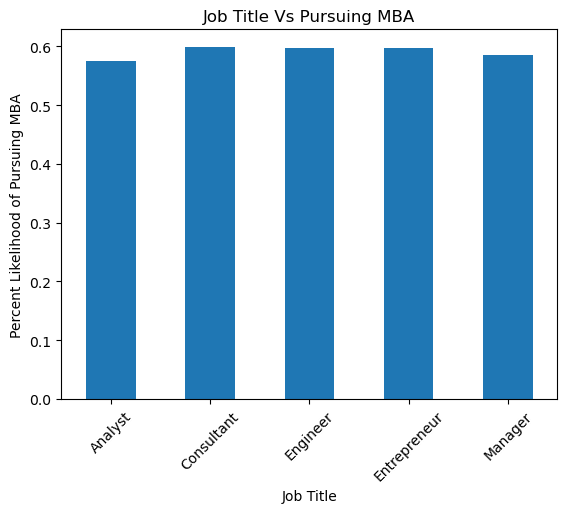

In [10]:
labels = ["Analyst", "Consultant", "Engineer", "Entrepreneur", "Manager"]

job_title_df["Pct Pursued"].plot(kind = "bar", stacked = False, title = "Job Title Vs Pursuing MBA")
plt.xticks(rotation=45)

plt.xlabel("Job Title")
plt.ylabel("Percent Likelihood of Pursuing MBA")

plt.show()

**Report 1.1**
<br />
In our Analysis of the affect Job Title has on the liklihood of pursuing an MBA, the percentage values were as follows: <br />
<br />
Analysts: 58% <br />
Consultants: 60% <br />
Engineers: 60% <br />
Entrepreneurs: 60% <br />
Managers: 59% <br />
<br />
This analysis showed that Job Title was not a deciding factor since all titles were almost equally likely to pursue an MBA.
<br />
This test was inconclusive.

## Analysis 1.2. Post MBA Role vs Pursuing MBA

In [11]:
# Determine how many participants from each post-mba role
post_mba_role_counts = employment_df["Desired Post-MBA Role"].value_counts()
total_consultantR_count = post_mba_role_counts["Consultant"]
total_executive_count = post_mba_role_counts["Executive"]
total_finance_manager_count = post_mba_role_counts["Finance Manager"]
total_marketing_director_count = post_mba_role_counts["Marketing Director"]
total_startup_founder_count = post_mba_role_counts["Startup Founder"]

# Determine how many MBA pursuers from each post-mba role
post_mba_pursuers = mba_pursuers["Desired Post-MBA Role"].value_counts()
consultantR_pursuer_count = post_mba_pursuers["Consultant"]
executive_pursuer_count = post_mba_pursuers["Executive"]
finance_manager_pursuer_count = post_mba_pursuers["Finance Manager"]
marketing_director_pursuer_count = post_mba_pursuers["Marketing Director"]
startup_founder_pursuer_count = post_mba_pursuers["Startup Founder"]

# Determine how many MBA non-pursuers from each post-mba role
post_mba_non_pursuers = non_mba_pursuers["Desired Post-MBA Role"].value_counts()
consultantR_non_pursuer_count = post_mba_non_pursuers["Consultant"]
executive_non_pursuer_count = post_mba_non_pursuers["Executive"]
finance_manager_non_pursuer_count = post_mba_non_pursuers["Finance Manager"]
marketing_director_non_pursuer_count = post_mba_non_pursuers["Marketing Director"]
startup_founder_non_pursuer_count = post_mba_non_pursuers["Startup Founder"]

post_mba_role_counts

Desired Post-MBA Role
Executive             2041
Marketing Director    2027
Consultant            1986
Startup Founder       1978
Finance Manager       1968
Name: count, dtype: int64

In [12]:
post_mba_role_df = pd.DataFrame({
    "Pursued": {"Consultant": consultantR_pursuer_count, "Executive": executive_pursuer_count, "Finance Manager": finance_manager_pursuer_count, "Marketing Director": marketing_director_pursuer_count, "Startup Founder": startup_founder_pursuer_count},
    "Not Pursued": {"Consultant": consultantR_non_pursuer_count, "Executive": executive_non_pursuer_count, "Finance Manager": finance_manager_non_pursuer_count, "Marketing Director": marketing_director_non_pursuer_count, "Startup Founder": startup_founder_non_pursuer_count},
    "Pct Pursued": {"Consultant": consultantR_pursuer_count/total_consultantR_count, 
                    "Executive": executive_pursuer_count/total_executive_count, 
                    "Finance Manager": finance_manager_pursuer_count/total_finance_manager_count, 
                    "Marketing Director": marketing_director_pursuer_count/total_marketing_director_count, 
                    "Startup Founder": startup_founder_pursuer_count/total_startup_founder_count}
})
post_mba_role_df

,Pursued,Not Pursued,Pct Pursued
Consultant,1194,792,0.601208
Executive,1199,842,0.587457
Finance Manager,1155,813,0.586890
Marketing Director,1191,836,0.587568
Startup Founder,1168,810,0.590495


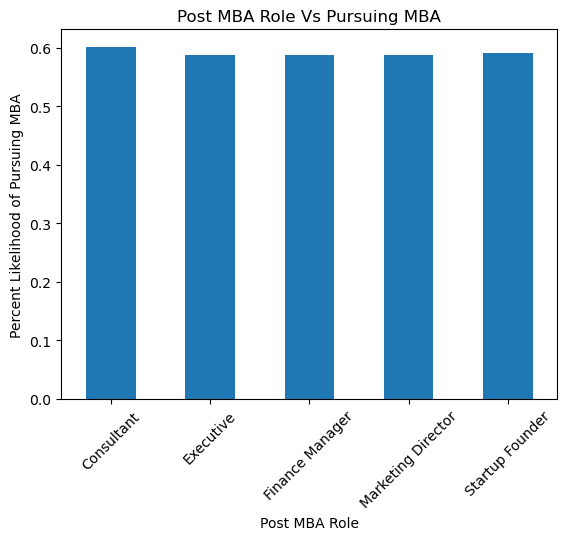

In [13]:
labels = ["Consultant", "Executive", "Finance Manager", "Marketing Director", "Startup Founder"]

post_mba_role_df["Pct Pursued"].plot(kind = "bar", stacked = False, title = "Post MBA Role Vs Pursuing MBA")
plt.xticks(rotation=45)

plt.xlabel("Post MBA Role")
plt.ylabel("Percent Likelihood of Pursuing MBA")

plt.show()

**Report 1.2**
<br />
In our Analysis of the affect Post-MBA has on the liklihood of pursuing an MBA, the percentage values were as follows: <br />
<br />
Consultant: 60% <br />
Executive: 59% <br />
Finance Manager: 59% <br />
Marketing Director: 59% <br />
Startup Founder: 59% <br />
<br />
This analysis showed that Post-MBA Role was not a deciding factor since all roles were almost equally likely to pursue an MBA.
<br />
This test was inconclusive.

## Analysis 1.3. Salary Increase As A Factor For MBA Pursuers

In [14]:
# Update employment dataframe to show Net Salary Increase Column for all participants
employment_df["Net Salary Increase"] = (employment_df["Expected Post-MBA Salary"] - employment_df["Annual Salary (Before MBA)"])
all_net_salary_increase_df = employment_df[["Annual Salary (Before MBA)", "Desired Post-MBA Role", "Expected Post-MBA Salary", "Net Salary Increase"]]
all_net_salary_increase_df

C:\Users\batuh\AppData\Local\Temp\ipykernel_16196\489193882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_df["Net Salary Increase"] = (employment_df["Expected Post-MBA Salary"] - employment_df["Annual Salary (Before MBA)"])


,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,Net Salary Increase
0,90624,Finance Manager,156165,65541
1,53576,Startup Founder,165612,112036
2,79796,Consultant,122248,42452
3,105956,Consultant,123797,17841
4,96132,Consultant,197509,101377
...,...,...,...,...
9995,109172,Startup Founder,69000,-40172
9996,82515,Consultant,131054,48539
9997,34152,Consultant,100806,66654
9998,61897,Marketing Director,115872,53975


In [15]:
# Update MBA pursuers dataframe to show Net Salary Increase Column for all pursuers
mba_pursuers["Net Salary Increase"] = (mba_pursuers["Expected Post-MBA Salary"] - mba_pursuers["Annual Salary (Before MBA)"])
mba_pursuers_net_salary_increase_df = mba_pursuers[["Annual Salary (Before MBA)", "Desired Post-MBA Role", "Expected Post-MBA Salary", "Net Salary Increase"]]
mba_pursuers_net_salary_increase_df

C:\Users\batuh\AppData\Local\Temp\ipykernel_16196\1904747133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mba_pursuers["Net Salary Increase"] = (mba_pursuers["Expected Post-MBA Salary"] - mba_pursuers["Annual Salary (Before MBA)"])


,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,Net Salary Increase
0,90624,Finance Manager,156165,65541
4,96132,Consultant,197509,101377
7,100072,Finance Manager,199447,99375
8,118689,Executive,76037,-42652
9,112387,Startup Founder,92294,-20093
...,...,...,...,...
9993,76025,Startup Founder,86385,10360
9994,92456,Finance Manager,135949,43493
9995,109172,Startup Founder,69000,-40172
9997,34152,Consultant,100806,66654


In [16]:
# Find Mean salary increase for MBA pursuers
mba_pursuers_net_salary_increase_df.groupby("Desired Post-MBA Role")["Net Salary Increase"].mean()

Desired Post-MBA Role
Consultant            54398.361809
Executive             58309.918265
Finance Manager       53032.413853
Marketing Director    54559.693535
Startup Founder       55605.188356
Name: Net Salary Increase, dtype: float64

In [17]:
# Find the number of MBA pursuers who expected a net salary increase after attaining their MBA
mba_pursuers_post_salary_increase = mba_pursuers_net_salary_increase_df.loc[(mba_pursuers_net_salary_increase_df["Net Salary Increase"] >= 0)]
mba_pursuers_post_salary_increase

,Annual Salary (Before MBA),Desired Post-MBA Role,Expected Post-MBA Salary,Net Salary Increase
0,90624,Finance Manager,156165,65541
4,96132,Consultant,197509,101377
7,100072,Finance Manager,199447,99375
14,84941,Marketing Director,190224,105283
15,62979,Marketing Director,173363,110384
...,...,...,...,...
9992,39909,Finance Manager,149757,109848
9993,76025,Startup Founder,86385,10360
9994,92456,Finance Manager,135949,43493
9997,34152,Consultant,100806,66654


In [18]:
# Find how many MBA pursuers expected a net salary increase after attaining their MBA
total_mba_pursuers = mba_pursuers.shape[0]
mba_pursuers_post_salary_increase_count =  mba_pursuers_post_salary_increase.shape[0]
pct_pursuers_post_salary_increase = mba_pursuers_post_salary_increase_count/total_mba_pursuers
pct_pursuers_post_salary_decrease = (1 - pct_pursuers_post_salary_increase)

print(f"Total MBA Pursuers: {total_mba_pursuers}")
print(f"MBA Pursuers expecting a net salary increase: {mba_pursuers_post_salary_increase_count}")
print(f"MBA Pursuers expecting a net salary decrease: {total_mba_pursuers - mba_pursuers_post_salary_increase_count}")

Total MBA Pursuers: 5907
MBA Pursuers expecting a net salary increase: 5045
MBA Pursuers expecting a net salary decrease: 862


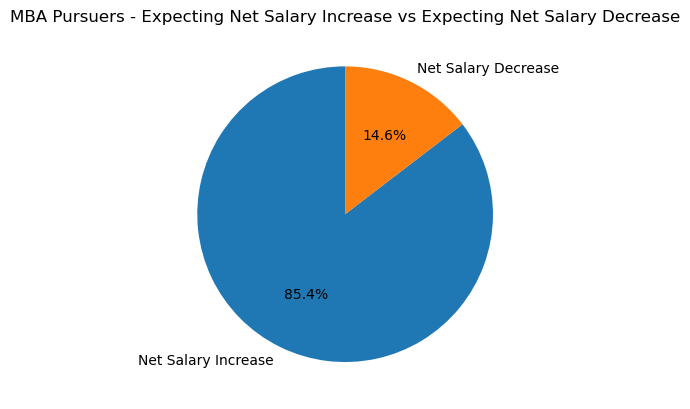

In [19]:
# Create a pie chart illustrating MBA pursuers who expected a net salary increase vs net salary decrease
labels = ["Net Salary Increase", "Net Salary Decrease"]
sizes = [pct_pursuers_post_salary_increase, pct_pursuers_post_salary_decrease]

plt.pie(sizes, labels = labels, autopct = "%1.1f%%", startangle=90)
plt.title("MBA Pursuers - Expecting Net Salary Increase vs Expecting Net Salary Decrease")
plt.show()

**Report 1.3** <br />
5045 out of 5907 mba pursuers expected to see a net salary increase after pursuing an MBA.<br />
<br />
This shows us that 85.4% of MBA pursuers were likely motivated by earnings potential as a key factor when making their decision.<br />
<br />
14.6% of MBA pursuers did not expect a net salary increase, and were likely motivated to pursue an MBA for other factors relating to career change, or future career success.

## Analysis 1.4. Which Reasons Motivated More Participants to Pursue An MBA

In [20]:
# Store all the reasons for pursuing an MBA 
mba_reasons = [value for value in mba_pursuers["Reason for MBA"].unique()]
mba_reasons

['Entrepreneurship', 'Skill Enhancement', 'Career Growth', 'Networking']

In [21]:
# Determine values of Reason for MBAs and their value counts for pursuers
mba_pursuers["Reason for MBA"].value_counts()

Reason for MBA
Networking           1530
Skill Enhancement    1498
Career Growth        1444
Entrepreneurship     1435
Name: count, dtype: int64

In [22]:
# Determine values of Reason for MBAs and their value counts for non-pursuers
non_mba_pursuers["Reason for MBA"].value_counts()

Reason for MBA
Career Growth        1075
Networking           1016
Skill Enhancement    1015
Entrepreneurship      987
Name: count, dtype: int64

In [23]:
# Store totals for MBA pursuers and their reasons
entrep_total = mba_pursuers["Reason for MBA"].value_counts()[3]
skills_total = mba_pursuers["Reason for MBA"].value_counts()[1]
networking_total = mba_pursuers["Reason for MBA"].value_counts()[0]
growth_total = mba_pursuers["Reason for MBA"].value_counts()[2]

In [24]:
# Store totals for MBA non-pursuers and their reasons
entrep_total_not_pursued = non_mba_pursuers["Reason for MBA"].value_counts()[3]
skills_total_not_pursued = non_mba_pursuers["Reason for MBA"].value_counts()[1]
networking_total_not_pursued = non_mba_pursuers["Reason for MBA"].value_counts()[0]
growth_total_not_pursued = non_mba_pursuers["Reason for MBA"].value_counts()[2]

In [25]:
# Create a data frame for each job title that shows how much their decision was influenced by these reasons
#     Seperate data based on mba_reasons
entrep_pursued = mba_pursuers.loc[mba_pursuers["Reason for MBA"] == mba_reasons[0], :]
skill_enhancement_pursued = mba_pursuers.loc[mba_pursuers["Reason for MBA"] == mba_reasons[1], :]
career_growth_pursued = mba_pursuers.loc[mba_pursuers["Reason for MBA"] == mba_reasons[2], :]
networking_pursued = mba_pursuers.loc[mba_pursuers["Reason for MBA"] == mba_reasons[3], :]

# Group by Current Job Title and determine count of each reason for MBA 
# ("Reason for MBA" column must be added to get count of 1D series)
pursued_for_entrepreneurship = entrep_pursued.groupby("Current Job Title")["Reason for MBA"].count()
pursued_for_skills = skill_enhancement_pursued.groupby("Current Job Title")["Reason for MBA"].count()
pursued_for_growth = career_growth_pursued.groupby("Current Job Title")["Reason for MBA"].count()
pursued_for_networking = networking_pursued.groupby("Current Job Title")["Reason for MBA"].count()

# Calculate percentages
entrep_pursued_pct = pursued_for_entrepreneurship/entrep_total
skills_pursued_pct = pursued_for_skills/skills_total
growth_pursued_pct = pursued_for_growth/growth_total
networking_pursued_pct = pursued_for_networking/networking_total

# Create the Dataframe
pursued_reason_df = pd.DataFrame({
    "Entrepreneurship":  pursued_for_entrepreneurship,
    "Percent (1)": entrep_pursued_pct,
    "Skill Enhancement": pursued_for_skills,
    "Percent (2)": skills_pursued_pct,
    "Career Growth": pursued_for_growth,
    "Percent (3)": growth_pursued_pct,
    "Networking": pursued_for_networking,
    "Percent (4)": networking_pursued_pct,
})

pursued_reason_df

,Entrepreneurship,Percent (1),Skill Enhancement,Percent (2),Career Growth,Percent (3),Networking,Percent (4)
Current Job Title,,,,,,,,
Analyst,289,0.201394,291,0.194259,275,0.190443,299,0.195425
Consultant,300,0.209059,294,0.196262,291,0.201524,306,0.200000
Engineer,256,0.178397,322,0.214953,299,0.207064,319,0.208497
Entrepreneur,289,0.201394,312,0.208278,293,0.202909,320,0.209150
Manager,301,0.209756,279,0.186248,286,0.198061,286,0.186928


Affect of Reasons on Pursing an MBA (Percentages) broken down by Current Job Title: <br /><br />
Analysts: <br />
> Entrepreneurship: 20.1% <br />
Skill Enhancement: 19.4% <br />
Career Growth: 19.0% <br />
Networking: 19.5% <br />

Consultants: <br />
> Entrepreneurship: 20.9% <br />
Skill Enhancement: 19.6% <br />
Career Growth: 20.2% <br />
Networking: 20.0% <br />

Engineer: <br />
> Entrepreneurship: 17.8% <br />
Skill Enhancement: 21.5% <br />
Career Growth: 20.7% <br />
Networking: 20.8% <br />

In [26]:
# Create a new dataframe and then drop the percent columns so we can show how the reasons affect MBA pursuers
pursued_reason_graph_df = pursued_reason_df.copy()
pursued_reason_graph_df.drop(columns = ["Percent (1)", "Percent (2)", "Percent (3)", "Percent (4)"], inplace = True)
pursued_reason_graph_df

,Entrepreneurship,Skill Enhancement,Career Growth,Networking
Current Job Title,,,,
Analyst,289,291,275,299
Consultant,300,294,291,306
Engineer,256,322,299,319
Entrepreneur,289,312,293,320
Manager,301,279,286,286


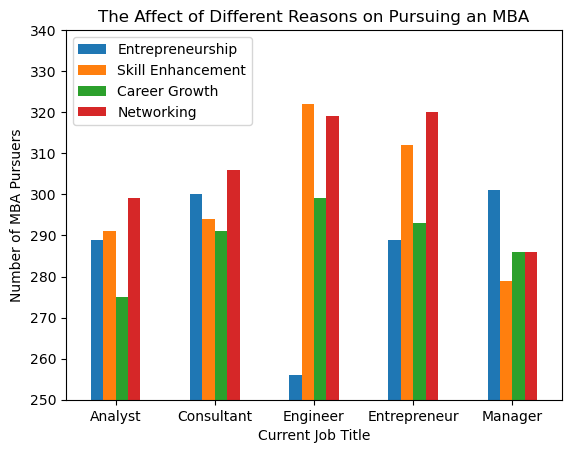

In [27]:
pursued_reason_graph_df.plot.bar()
plt.xticks(rotation='horizontal')
plt.title("The Affect of Different Reasons on Pursuing an MBA")
plt.xlabel("Current Job Title")
plt.ylabel("Number of MBA Pursuers")
plt.ylim(250,340)
plt.show()

In [28]:
# Create a data frame for each job title that shows how much their decision was influenced by these reasons
#     Seperate data based on mba_reasons
entrep_not_pursued = non_mba_pursuers.loc[non_mba_pursuers["Reason for MBA"] == mba_reasons[0], :]
skill_enhancement_not_pursued = non_mba_pursuers.loc[non_mba_pursuers["Reason for MBA"] == mba_reasons[1], :]
career_growth_not_pursued = non_mba_pursuers.loc[non_mba_pursuers["Reason for MBA"] == mba_reasons[2], :]
networking_not_pursued = non_mba_pursuers.loc[non_mba_pursuers["Reason for MBA"] == mba_reasons[3], :]

# Group by Current Job Title and determine count of each reason for not pursuing MBA 
# ("Reason for MBA" column must be added to get count of 1D series)
not_pursued_for_entrepreneurship = entrep_not_pursued.groupby("Current Job Title")["Reason for MBA"].count()
not_pursued_for_skills = skill_enhancement_not_pursued.groupby("Current Job Title")["Reason for MBA"].count()
not_pursued_for_growth = career_growth_not_pursued.groupby("Current Job Title")["Reason for MBA"].count()
not_pursued_for_networking = networking_not_pursued.groupby("Current Job Title")["Reason for MBA"].count()

# Calculate percentages
entrep_not_pursued_pct = not_pursued_for_entrepreneurship/entrep_total_not_pursued
skills_not_pursued_pct = not_pursued_for_skills/skills_total_not_pursued
growth_not_pursued_pct = not_pursued_for_growth/growth_total_not_pursued
networking_not_pursued_pct = not_pursued_for_networking/networking_total_not_pursued

# Create the Dataframe
not_pursued_reason_df = pd.DataFrame({
    "Entrepreneurship":  not_pursued_for_entrepreneurship,
    "Percent (1)": entrep_not_pursued_pct,
    "Skill Enhancement": not_pursued_for_skills,
    "Percent (2)": skills_not_pursued_pct,
    "Career Growth": not_pursued_for_growth,
    "Percent (3)": growth_not_pursued_pct,
    "Networking": not_pursued_for_networking,
    "Percent (4)": networking_not_pursued_pct,
})
not_pursued_reason_df

,Entrepreneurship,Percent (1),Skill Enhancement,Percent (2),Career Growth,Percent (3),Networking,Percent (4)
Current Job Title,,,,,,,,
Analyst,223,0.225937,210,0.206693,218,0.214778,201,0.186977
Consultant,190,0.192503,197,0.193898,219,0.215764,192,0.178605
Engineer,189,0.191489,208,0.204724,205,0.201970,205,0.190698
Entrepreneur,182,0.184397,202,0.198819,217,0.213793,219,0.203721
Manager,203,0.205674,198,0.194882,216,0.212808,199,0.185116


In [29]:
# Create a new dataframe and then drop the percent columns so we can show how the reasons affect MBA pursuers
not_pursued_reason_graph_df = not_pursued_reason_df.copy()
not_pursued_reason_graph_df.drop(columns = ["Percent (1)", "Percent (2)", "Percent (3)", "Percent (4)"], inplace = True)
not_pursued_reason_graph_df

,Entrepreneurship,Skill Enhancement,Career Growth,Networking
Current Job Title,,,,
Analyst,223,210,218,201
Consultant,190,197,219,192
Engineer,189,208,205,205
Entrepreneur,182,202,217,219
Manager,203,198,216,199


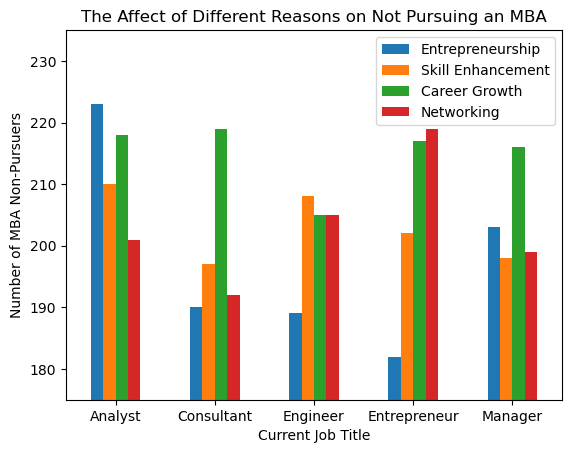

In [30]:
not_pursued_reason_graph_df.plot.bar()
plt.xticks(rotation='horizontal')
plt.title("The Affect of Different Reasons on Not Pursuing an MBA")
plt.xlabel("Current Job Title")
plt.ylabel("Number of MBA Non-Pursuers")
plt.ylim(175,235)
plt.show()

## 2.CREATING SCHOOL DATAFRAME

In [31]:
# Create a Dataframe based solely on school factors
school_df = decision_df[["Age","Gender","Undergraduate Major","Undergraduate GPA","Current Job Title","GRE/GMAT Score","Undergrad University Ranking","MBA Funding Source","Reason for MBA", "Online vs. On-Campus MBA","Decided to Pursue MBA?"]]
school_df.head()

,Age,Gender,Undergraduate Major,Undergraduate GPA,Current Job Title,GRE/GMAT Score,Undergrad University Ranking,MBA Funding Source,Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,Male,Arts,3.18,Entrepreneur,688,185,Loan,Entrepreneurship,On-Campus,1
1,24,Male,Arts,3.03,Analyst,791,405,Loan,Career Growth,Online,0
2,33,Female,Business,3.66,Engineer,430,107,Scholarship,Skill Enhancement,Online,0
3,31,Male,Engineering,2.46,Manager,356,257,Loan,Entrepreneurship,On-Campus,0
4,28,Female,Business,2.75,Entrepreneur,472,338,Loan,Skill Enhancement,Online,1


## Analysis 2.1. Undergraduate Major vs Pursuing MBA

In [32]:
# Filtered "school_df" according to "Decided to Pursue MBA? = 1"
undergraduate_only_yes = school_df.loc[school_df["Decided to Pursue MBA?"] == 1]
undergraduate_only_yes

,Age,Gender,Undergraduate Major,Undergraduate GPA,Current Job Title,GRE/GMAT Score,Undergrad University Ranking,MBA Funding Source,Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,Male,Arts,3.18,Entrepreneur,688,185,Loan,Entrepreneurship,On-Campus,1
4,28,Female,Business,2.75,Entrepreneur,472,338,Loan,Skill Enhancement,Online,1
7,27,Male,Engineering,2.80,Engineer,588,190,Loan,Entrepreneurship,On-Campus,1
8,30,Female,Arts,2.06,Entrepreneur,521,455,Scholarship,Career Growth,On-Campus,1
9,23,Female,Arts,3.51,Entrepreneur,671,411,Scholarship,Entrepreneurship,Online,1
...,...,...,...,...,...,...,...,...,...,...,...
9993,25,Male,Arts,3.40,Entrepreneur,311,233,Employer,Skill Enhancement,Online,1
9994,23,Male,Business,3.28,Entrepreneur,256,190,Self-funded,Networking,Online,1
9995,33,Female,Economics,3.55,Analyst,524,100,Loan,Networking,Online,1
9997,31,Female,Economics,2.86,Manager,681,308,Loan,Networking,On-Campus,1


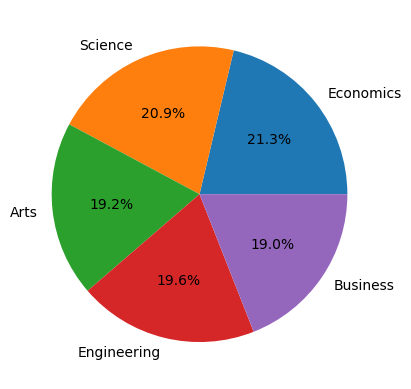

In [33]:
# Distribution of Undergraduate Major (Only "Yes")

only_yes_dist = undergraduate_only_yes["Undergraduate Major"].value_counts()

labels = ["Economics", "Science", "Arts", "Engineering", "Business" ]

sizes = [only_yes_dist["Economics"], only_yes_dist["Science"], only_yes_dist["Arts"], only_yes_dist["Engineering"], only_yes_dist["Business"] ]
plt.pie(sizes, labels = labels, autopct="%1.1f%%")
plt.show()

**Report 2.1**
<br />
In our Analysis of the affect Undergraduate Major has on the liklihood of pursuing an MBA, the percentage values were as follows: <br />
<br />
Business: 19.0% <br />
Arts: 19.2% <br />
Engineering: 19.6% <br />
Science: 20.9% <br />
Economics: 21.3% <br />
<br />
This analysis showed that Undergraduate Major was not a deciding factor since all study fields were almost equally likely to pursue an MBA.
<br />
This test was inconclusive.

## Analysis 2.2. University Ranking vs Pursuing MBA

In [34]:
# Find maximum value of University ranking
school_df["Undergrad University Ranking"].max()

499

C:\Users\batuh\AppData\Local\Temp\ipykernel_16196\2027945337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_df["Ranking Category"] = pd.cut(school_df["Undergrad University Ranking"], bins=bins, labels=labels)


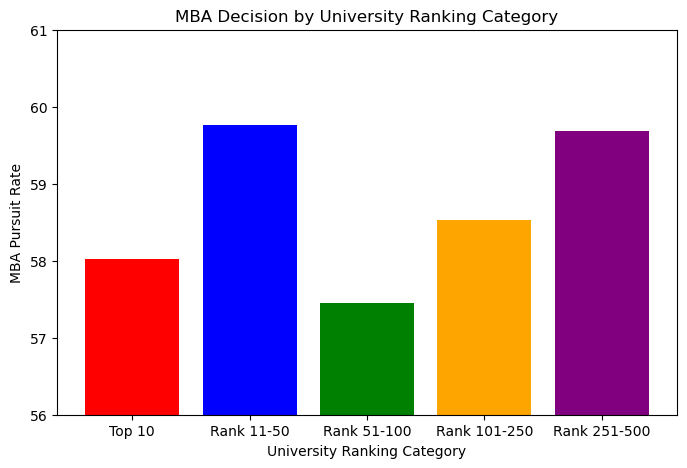

In [35]:
# Create a new category column as "Ranking Category"
bins = [0, 10, 50, 100, 250, 500]
labels = ["Top 10", "Rank 11-50", "Rank 51-100", "Rank 101-250", "Rank 251-500"]

school_df["Ranking Category"] = pd.cut(school_df["Undergrad University Ranking"], bins=bins, labels=labels)

# Calculate the MBA completion rates by groups
mba_by_ranking = school_df.groupby("Ranking Category")["Decided to Pursue MBA?"].count()
mba_by_ranking_only_yes = school_df.loc[school_df["Decided to Pursue MBA?"] == 1].groupby("Ranking Category")["Decided to Pursue MBA?"].count()
ratio = mba_by_ranking_only_yes / mba_by_ranking * 100 

# Display the results
plt.figure(figsize=(8,5))
bar_colors = ["red", "blue", "green", "orange", "purple"]
plt.bar(ratio.index,ratio.values, color = bar_colors )
plt.xlabel("University Ranking Category")
plt.ylabel("MBA Pursuit Rate")
plt.title("MBA Decision by University Ranking Category")
plt.ylim(56,61)
plt.show()


**Logistic Regression Analysis - University Ranking vs Pursuing MBA**

In [36]:
# Independent variable: University rankings
X = school_df[["Undergrad University Ranking"]]
X = sm.add_constant(X)  # Add constant value

# Dependent variable: Decision to pursue an MBA (Binary: 0 or 1)
y = school_df["Decided to Pursue MBA?"]

# Logistic Regression Model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.676589
         Iterations 4
                             Logit Regression Results                             
Dep. Variable:     Decided to Pursue MBA?   No. Observations:                10000
Model:                              Logit   Df Residuals:                     9998
Method:                               MLE   Df Model:                            1
Date:                    Tue, 11 Feb 2025   Pseudo R-squ.:               1.998e-05
Time:                            20:28:18   Log-Likelihood:                -6765.9
converged:                           True   LL-Null:                       -6766.0
Covariance Type:                nonrobust   LLR p-value:                    0.6031
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3488 

**Report 2.2**
<br />
In our Logistic Regression Analysis of the affect University Ranking has on the liklihood of pursuing an MBA, the key parameters were as follows: <br />
<br />
The model is not statistically significant overall (**LLR p-value: 0.603 > 0.05**). <br />
The variable **"Undergrad University Ranking"** has no significant effect on the MBA decision (**p = 0.603**). <br />
The **Pseudo R² value is very low**, indicating that the independent variables are insufficient to explain the MBA decision. <br />

<br />
This analysis showed that The model is not a good predictor of the MBA decision, and the "Undergrad University Ranking" variable has no significant effect.
<br />
This test was inconclusive.

## Analysis 2.3. Undergraduate GPA vs Pursuing MBA 

In [37]:
# Find maximum value of Undergraduate GPA
school_df["Undergraduate GPA"].max()

4.0

In [38]:
# Divide GPA into categories
bins = [0, 2.5, 3.2, 3.7, 4.0]
labels = ["Low", "Medium", "High", "Very High"]
school_df["GPA Category"] = pd.cut(school_df["Undergraduate GPA"], bins=bins, labels=labels)


C:\Users\batuh\AppData\Local\Temp\ipykernel_16196\1972618766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_df["GPA Category"] = pd.cut(school_df["Undergraduate GPA"], bins=bins, labels=labels)


In [39]:
# Calculate the percentage of MBA students in each GPA category
gpa_mba_ratio = school_df.groupby("GPA Category")["Decided to Pursue MBA?"].mean()

# Display the results
print(gpa_mba_ratio)


GPA Category
Low          0.593566
Medium       0.599943
High         0.572945
Very High    0.594556
Name: Decided to Pursue MBA?, dtype: float64


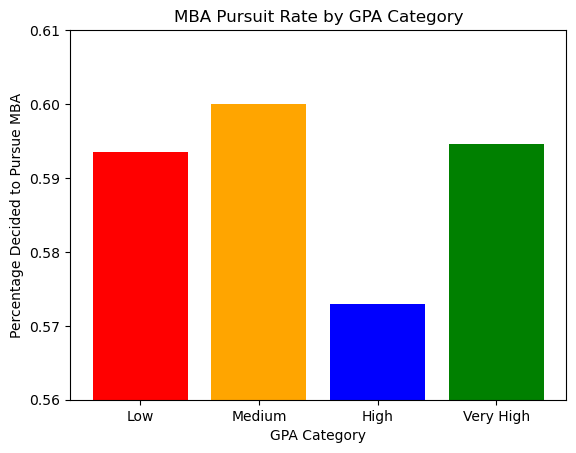

In [40]:
# Draw a bar chart
plt.bar(gpa_mba_ratio.index, gpa_mba_ratio.values, color=["red", "orange", "blue", "green"])

# Chart title and labels
plt.title("MBA Pursuit Rate by GPA Category")
plt.xlabel("GPA Category")
plt.ylabel("Percentage Decided to Pursue MBA")
plt.ylim(0.56, 0.61)
plt.show()


**Report 2.3**
<br />
In our Analysis of the affect Undergraduate GPA has on the liklihood of pursuing an MBA, the percentage values were as follows: <br />
<br />
Low: 59.4% <br />
Medium: 60.0% <br />
High: 57.3% <br />
Very High: 59.5% <br />
<br />
This analysis showed that Undergraduate GPA was not a deciding factor since all GPA categories were almost equally likely to pursue an MBA.
<br />
This test was inconclusive.

## Analysis 2.4. Funding Source vs Pursuing MBA

In [41]:
# Calculate the percentage of MBA students in each Funding Source category
mba_funding_analysis = school_df.groupby("MBA Funding Source")["Decided to Pursue MBA?"].mean().sort_values()
print(mba_funding_analysis)


MBA Funding Source
Scholarship    0.583766
Self-funded    0.585185
Employer       0.592199
Loan           0.601343
Name: Decided to Pursue MBA?, dtype: float64


**ANOVA Test - Funding Source vs Pursuing MBA**

In [42]:
# Grouping by funding categories
funding_groups = [group["Decided to Pursue MBA?"] for _, group in school_df.groupby("MBA Funding Source")]

# ANOVA test
f_stat, p_value = st.f_oneway(*funding_groups)

#Display the results
print(f"ANOVA Test F-Statistic: {f_stat:.4f}")
print(f"ANOVA Test P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant difference between Funding source and decision to pursue MBA.")
else:
    print("There is no significant difference between Funding source and decision to pursue MBA.")



ANOVA Test F-Statistic: 0.6707
ANOVA Test P-Value: 0.5699
There is no significant difference between Funding source and decision to pursue MBA.


##  Multivariable Logistic Regression Analysis: Factors Influencing Pursuing MBA

In [43]:
# Logistic Regression Analysis
# Convert variables with one-hot encoding
school_df_encoded = pd.get_dummies(school_df, 
                                   columns=["Undergraduate Major", "Gender", "MBA Funding Source", "Online vs. On-Campus MBA"], 
                                   drop_first=True)

# Independent variables (X) and dependent variable (Y)
X = school_df_encoded[["Age", "Undergraduate GPA", "GRE/GMAT Score", 
                       "Undergrad University Ranking"] + 
                      [col for col in school_df_encoded.columns if col.startswith(("Undergraduate Major_", 
                                                                                   "MBA Funding Source_", 
                                                                                   "Online vs. On-Campus MBA_",
                                                                                  "Gender_"))]]
X = X.astype(float)
y = school_df_encoded['Decided to Pursue MBA?']

# Creating the logistic regression model
X = sm.add_constant(X) # Add constant value
model = sm.Logit(y, X).fit()

# Display the results
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.676204
         Iterations 4
                             Logit Regression Results                             
Dep. Variable:     Decided to Pursue MBA?   No. Observations:                10000
Model:                              Logit   Df Residuals:                     9985
Method:                               MLE   Df Model:                           14
Date:                    Tue, 11 Feb 2025   Pseudo R-squ.:               0.0005900
Time:                            20:28:19   Log-Likelihood:                -6762.0
converged:                           True   LL-Null:                       -6766.0
Covariance Type:                nonrobust   LLR p-value:                    0.8901
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             

## 3.CREATING GENDER BASED DATAFRAME

In [44]:
#Create a gender-specific dataframe

gender_based_df= decision_df[["Age","Gender","Decided to Pursue MBA?","Current Job Title","Annual Salary (Before MBA)","Years of Work Experience","Expected Post-MBA Salary","Reason for MBA","Has Management Experience"]]
gender_based_df.head()

,Age,Gender,Decided to Pursue MBA?,Current Job Title,Annual Salary (Before MBA),Years of Work Experience,Expected Post-MBA Salary,Reason for MBA,Has Management Experience
0,27,Male,1,Entrepreneur,90624,8,156165,Entrepreneurship,0
1,24,Male,0,Analyst,53576,4,165612,Career Growth,1
2,33,Female,0,Engineer,79796,9,122248,Skill Enhancement,0
3,31,Male,0,Manager,105956,1,123797,Entrepreneurship,0
4,28,Female,1,Entrepreneur,96132,9,197509,Skill Enhancement,0


## Analysis 3.1. MBA vs Gender

In [45]:
MBA_pursuers = gender_based_df.loc[gender_based_df["Decided to Pursue MBA?"] == 1]
MBA_pursuers.head()

,Age,Gender,Decided to Pursue MBA?,Current Job Title,Annual Salary (Before MBA),Years of Work Experience,Expected Post-MBA Salary,Reason for MBA,Has Management Experience
0,27,Male,1,Entrepreneur,90624,8,156165,Entrepreneurship,0
4,28,Female,1,Entrepreneur,96132,9,197509,Skill Enhancement,0
7,27,Male,1,Engineer,100072,6,199447,Entrepreneurship,1
8,30,Female,1,Entrepreneur,118689,6,76037,Career Growth,1
9,23,Female,1,Entrepreneur,112387,3,92294,Entrepreneurship,0


In [46]:
#Value counts of the gender
gender_data_df = MBA_pursuers["Gender"].value_counts()
gender_data_df

Gender
Male      2983
Female    2643
Other      281
Name: count, dtype: int64

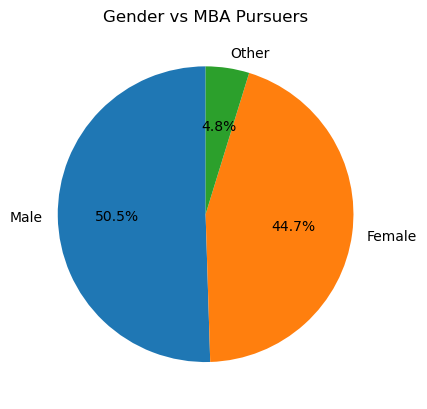

In [47]:
# Create a pie-chart showing gender that was more keen on pursuing the MBA

gender_data_df.plot.pie(y = gender_data_df,labels = gender_data_df.index, autopct = "%1.1f%%", startangle=90)

plt.title("Gender vs MBA Pursuers")
plt.ylabel("")
plt.show()

**Report 3.1**<br />
<br />
The above analysis provides a closer look at the role of gender in likelihood of pursuing MBA. The analysis provides the following observation:<br />
<br />
Male:      2983 (50.5%)<br />
Female:    2643 (44.7%)<br />
Other:      281 (4.8%)<br />
<br />
The observation reiterates and substantiates that more and more females are entering the finance field. It no more remains a male-dominated career as women as equally participating in it.

## Analysis 3.2

**This analysis tries bring forth the average age when the individuals are more probable to enroll in the MBA courses. And does age play a part in enrolling the MBA courses.**

In [48]:
# Here to show the maximum and the minimun age of the individuals joining the MBA course

age_df= gender_based_df.groupby("Gender")["Age"].agg(["max", "min"])

age_df

,max,min
Gender,,
Female,34,21
Male,34,21
Other,34,21


In [49]:
#grouby age 
per_age_df =gender_based_df.groupby(["Gender"])["Age"].mean()
per_age_df


Gender
Female    27.473094
Male      27.539129
Other     27.209850
Name: Age, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

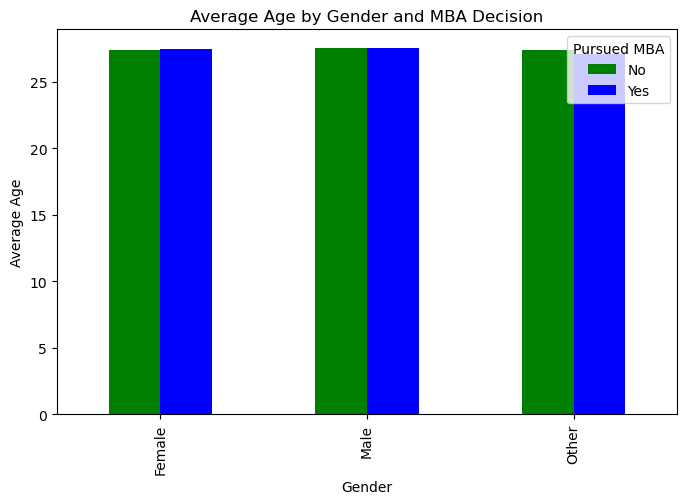

In [50]:
# Create a bar chart that presents a comaprision between the age of the applicant and pursuing MBA

age_comparision = gender_based_df.groupby(["Gender", "Decided to Pursue MBA?"])["Age"].mean().unstack()

#plot a bar cahrt
age_comparision.plot(kind="bar", figsize =(8,5), color=["green","blue"])

plt.xlabel("Gender")
plt.ylabel("Average Age")
plt.title("Average Age by Gender and MBA Decision")
plt.legend(title="Pursued MBA", labels = ["No", "Yes"])
plt.show

**Report 3.2**<br />
<br />
In the second analysis, there is an attempt to put forth if the age influenced the participants decision to enroll in the MBA courses. The individals that enrolled in the course, their age ranged from early 20's to early 30's. The youngest being 21 years old among all genders and 34 years old being the oldest among all genders. And in the analysis above the mean age of the individuals enrolling in the MBA courses is 27 years of age among all genders.<br />
<br />
Female:    27.47<br />
Male:      27.54<br />
Other:     27.21

## Analysis 3.3

**The subsequent analysis shows the change in the salaries of the individuals before and after enrolling in the MBA courses, that is a powerful motivator to pursue the MBA degree.**

In [51]:
#grouby salaries before MBA
per_salaries_df =gender_based_df.groupby(["Gender"])["Annual Salary (Before MBA)"].mean()
per_salaries_df



Gender
Female    75445.644170
Male      75044.583284
Other     73822.955032
Name: Annual Salary (Before MBA), dtype: float64

In [52]:
#grouby salaries after MBA
per_salaries1_df =gender_based_df.groupby(["Gender"])["Expected Post-MBA Salary"].mean()
per_salaries1_df


Gender
Female    130626.802691
Male      129936.032131
Other     131587.276231
Name: Expected Post-MBA Salary, dtype: float64

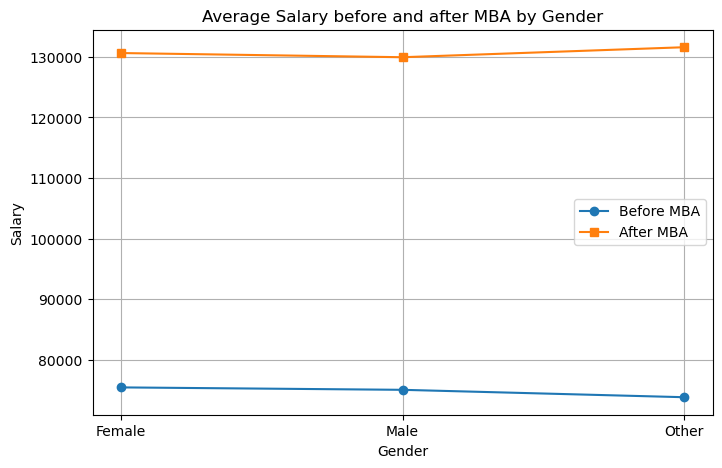

In [53]:
#Create a line chart showing the average salaries before the applicants pursued MBA

gender_salary = decision_df.groupby("Gender")[["Annual Salary (Before MBA)", "Expected Post-MBA Salary"]].mean()

#Plot the data
plt.figure(figsize=(8,5))
plt.plot(gender_salary.index, gender_salary["Annual Salary (Before MBA)"], marker = 'o', label="Before MBA")
plt.plot(gender_salary.index, gender_salary["Expected Post-MBA Salary"], marker ='s', label= "After MBA")

#labels
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.title("Average Salary before and after MBA by Gender")
plt.legend()
plt.grid("True")



#Show plot
plt.show()

**Report 3.3**<br />
<br />
The monetary benefit i.e., the salary increase is a strong motivator for individuals to pursue MBA. There is a significant rise in the salaries of indivduals after pursuing the MBA courses. The average increase among the genders more or less remains the same. The average rise being close to $55,000 approx.<br />
<br />
The average salary among the genders before MBA is as follows:<br />
<br />
Female:    75,445.64<br />
Male:      75,044.58<br />
Other:     73,822.96<br />
<br />
The average salary among the genders post MBA is as follows:<br />
<br />
Female:    130,626.80<br />
Male:      129,936.03<br />
Other:     131,587.28


## Analysis 3.4

**The following analysis tries to show the role of previous management experience has on the individuals (based on gender) willingness to pursue MBA.**

In [54]:
gender_data_df_1 = MBA_pursuers["Has Management Experience"].value_counts()
gender_data_df_1

Has Management Experience
0    3566
1    2341
Name: count, dtype: int64

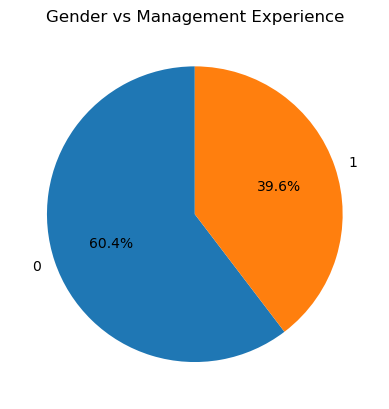

In [55]:
# Create a pie-chart showing gender that was more keen on pursuing the MBA

gender_data_df_1.plot.pie(y = MBA_pursuers,labels = gender_data_df_1.index, autopct = "%1.1f%%", startangle=90)

plt.title("Gender vs Management Experience")
plt.ylabel("")
plt.show()

**Report 3.4**<br />
<br />
The above analysis presents that the individauls without management experience were slightly more likely to enroll in the MBA courses. The results were as follows:<br />
<br />
Has Management Experience<br />
No:     3566 (60.4%)<br />
Yes:    2341 (39.6%)

## Analysis 3.5

**The following analysis shows the years of work experience an individual has before they enroll in the MBA courses.**

In [56]:
# Count of the Years of Experience
gender_data_df_2 = MBA_pursuers["Years of Work Experience"].value_counts()
gender_data_df_2

Years of Work Experience
6    618
4    607
7    604
1    599
8    594
5    593
2    580
9    573
0    571
3    568
Name: count, dtype: int64

In [57]:
# Average work experience individuals before enrolling in the MBA course
workexperience_comparision = MBA_pursuers.groupby(["Gender"])["Years of Work Experience"].mean()
workexperience_comparision

Gender
Female    4.508135
Male      4.538719
Other     4.437722
Name: Years of Work Experience, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

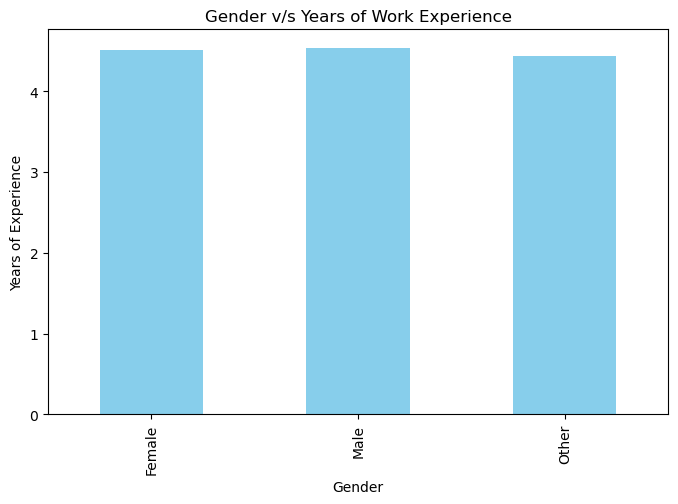

In [58]:
# Create a bar chart that presents a comaprision between the gender and the years of work experience of the applicant in pursuing MBA

workexperience_comparision = MBA_pursuers.groupby(["Gender"])["Years of Work Experience"].mean()

#plot a bar chart
workexperience_comparision.plot(kind="bar", figsize =(8,5), color=["skyblue"])

plt.xlabel("Gender")
plt.ylabel("Years of Experience")
plt.title("Gender v/s Years of Work Experience")
plt.show

**Report 3.5**<br />
<br />
The comparision between between the work experience and the enrollment in the MBA courses does not present a clear outcome. There is an average work experience of 4 years among all the genders. The work experience ranges between 1 to 9 years. The results are follows:<br />
<br />
Gender<br />
Female:    4.51<br />
Male:      4.54<br />
Other:     4.44<br />
<br />
Years of Work Experience<br />
6:    618<br />
4:    607<br />
7:    604<br />
1:    599<br />
8:    594<br />
5:    593<br />
2:    580<br />
9:    573<br />
0:    571<br />
3:    568

# Closing Remarks

**Note** <br />
We determined doing a correlation and linear regression model was not sufficient for this data set because the nature of using a binary measure (pursuing an mba or not pursuing an mba) would not yield readable results to help with our conclusion.